# 環境の設定

In [1]:
from blindcliftwalk import BlindCliftwalk

# ゴールまでの距離
nb_step = 20
#nb_step = 10

# ゴールの数
nb_goals = 3
#nb_goals = 1

env = BlindCliftwalk(nb_step, nb_goals)

In [2]:
import numpy as np

np.random.seed(seed=50)
env.set_ground_truth()
env.ground_truth

array([[2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

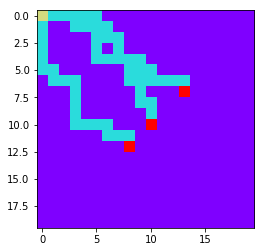

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(env.ground_truth, 'rainbow', interpolation='nearest')
#plt.savefig('ground_truth.png')

# 方策勾配法（REINFORCEアルゴリズム）で方策を学習する

- ガウス分布型の方策を使用する。
$$¥pi(a|s) =¥exp ¥Bigg( - ¥frac{(s-Wa)^2}{2¥sigma^2} ¥Bigg)$$

In [4]:
import tensorflow as tf

t_action = tf.placeholder(tf.float32, [None, 2], name='action')
t_state = tf.placeholder(tf.float32, [None, 2], name='state')
t_reward = tf.placeholder(tf.float32, [None, 1], name='reward')

#model = 'one-layer'
model = 'two-layers'

if model=='one-layer':
    rand = np.random.random(size=(2,2)).astype(np.float32)
    t_weights = tf.Variable(rand)
    t_policy_mean = tf.reduce_sum(t_weights* t_state, -1)
elif model=='two-layers':
    pass
#    rand1 = np.random.random(size=(10,2)).astype(np.float32)
#    rand2 = np.random.random(size=(2,10)).astype(np.float32)
#    t_weights1 = tf.Variable(rand1)
#    t_weights2 = tf.Variable(rand2)
#    t_policy_mean = tf.reduce_sum(t_weights2 * tf.nn.relu(tf.reduce_sum(t_weights1* t_state, -1)), -1)
    
#t_policy = tf.exp(-0.5 * tf.square(t_action - t_policy_mean))

#lr = 1e-3

if model=='one-layer':
    t_weights_grad = t_reward * tf.gradients(tf.log(t_policy), t_weights)[0]
    t_weights_ = t_weights - lr * t_weights_grad_sum
elif model=='two-layers':
#    t_weights_grad1 = t_reward * tf.gradients(tf.log(t_policy), t_weights1)[0]
#    t_weights_grad2 = t_reward * tf.gradients(tf.log(t_policy), t_weights2)[0]
#    t_weights1_ = t_weights1 - lr * t_weights_grad1
#    t_weights2_ = t_weights2 - lr * t_weights_grad2
    pass

/Users/ruhokondo/Programming/anaconda3/envs/dl35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/ruhokondo/Programming/anaconda3/envs/dl35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
sess = tf.InteractiveSession()
if model=='one-layer':
#    step = tf.group(t_weights.assign(t_weights_))
    compute_gradient  = tf.group(t_weights_grad_sum.assign(t_weights_grad))
elif model=='two-layers':
    nb_nodes = 100
    W1 = tf.Variable(tf.random_normal([2, nb_nodes], stddev=np.sqrt(2 / (2 + nb_nodes))), name='W1')
    W2 = tf.Variable(tf.random_normal([nb_nodes, 2], stddev=np.sqrt(2 / (nb_nodes + 2))), name='W2')
    b1 = tf.Variable(tf.random_normal([nb_nodes]), name='b1')
    b2 = tf.Variable(tf.random_normal([2]), name='b2')
    
    h1 = tf.nn.relu(tf.nn.bias_add(tf.matmul(t_state, W1),b1))
    t_policy_mean = tf.nn.softmax(tf.nn.bias_add(tf.matmul(h1, W2),b2))
#    t_policy = tf.exp(-0.5 * tf.square(t_action - t_policy_mean))
    t_policy = tf.square(t_action - t_policy_mean)

    t_weights_grad1 =  tf.gradients(t_reward * tf.log(t_policy), W1)[0]
    t_weights_grad2 =  tf.gradients(t_reward * tf.log(t_policy), W2)[0]
    t_bias_grad1 =  tf.gradients(t_reward * tf.log(t_policy), b1)[0]
    t_bias_grad2 =  tf.gradients(t_reward * tf.log(t_policy), b2)[0]
    t_policy_gradient = [
        (t_weights_grad1, W1),
        (t_weights_grad2, W2),
        (t_bias_grad1, b1),
        (t_bias_grad2, b2)
    ]
    train_step = tf.train.AdamOptimizer(learning_rate=1e-3).apply_gradients(t_policy_gradient)
tf.global_variables_initializer().run()

In [6]:
if model=='one-layer':
    initial_weights = t_weights.eval(sess)
elif model=='two-layers':
    pass
#    initial_weights = t_weights1.eval(sess),t_weights2.eval(sess)

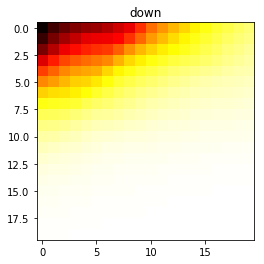

Text(0.5,1,'right')

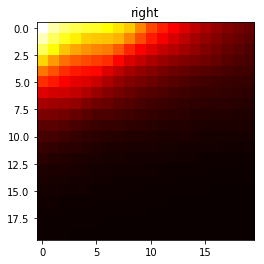

In [7]:
learnt_policy = np.expand_dims(np.zeros_like(env.ground_truth).astype(np.float32), -1)
learnt_policy = np.concatenate([learnt_policy,learnt_policy],-1)
for s0 in range(env.ground_truth.shape[0]):
    for s1 in range(env.ground_truth.shape[1]):
        state = np.array([s0,s1]).astype(np.float32)
#        state = np.array([s0,s1]).astype(np.float32) / 20.
        policy_mean = t_policy_mean.eval({t_state: np.expand_dims(state,0)}, sess)[0]
        learnt_policy[s0,s1,:] = policy_mean
plt.imshow(learnt_policy[:,:,0], 'hot')
plt.title('down')
plt.show()
plt.imshow(learnt_policy[:,:,1], 'hot')
plt.title('right')

In [8]:
#  episode数 = nb_epoch * nb_mc
nb_epoch = 1000

# MC計算に使うepisode数。パラメータ更新回数は　nb_episode　/　nb_mc　になる
nb_mc = 100

# ゴール到達後のstate valueの保存間隔
save_interval = 1000

# ε-greedyのハイパーパラメータ
epsilon = 0.3

In [9]:
def gumbel_sampling(prob):
    rand = np.random.random(len(prob))
    g = -np.log(-np.log(rand))
    return np.argmax(g+np.log(prob))

def epsilon_greedy(sess, t_policy_mean, state, env, epsilon):
    if np.random.random(1) > epsilon:
        action_prob = t_policy_mean.eval({t_state:np.expand_dims(state,0)}, sess) + np.finfo(np.float32).eps
    else:
        action_prob = np.random.random(2)
    action_prob = action_prob / action_prob.sum()
#    action = np.eye(2)[int(np.array(action_prob).argmax())].astype(int)
    action = np.eye(2)[gumbel_sampling(action_prob)].astype(int)
    return action_prob, action

In [10]:
from tqdm import tqdm
import copy

isSuccessed = False

temp = []
count = 0
success_history = []
for epoch in tqdm(range(int(nb_epoch))):
    episode_states = []
    episode_actions = []
    episode_rewards = []
    success_count = 0
    if not epoch%100:
        print()
    for mc_step in range(nb_mc):
        # 状態の初期化（スタート地点に戻る）
        current_state  = np.zeros(2, dtype=int)
    
        status = 0
        while status >= 0:
            # policyにしたがって行動を取る（まだ遷移させない）
            action_prob, action = epsilon_greedy(sess, t_policy_mean, current_state, env, epsilon)

            # 行動に対する報酬と遷移後の状態の計算
            next_state, reward, status = env.do_action(current_state, action)
#            if status==0:
#                reward=1#test
#            if status==1:
#                reward=10#test
            if status==-1:
                reward=-1#test
                
            if not epoch%100 and mc_step==0:
                print('s=',current_state,' p=',action_prob,' a=',action,' status=',status)
            
            # エピソード中の遷移前状態、行動、報酬を保存する
            episode_states.append(copy.deepcopy(current_state))
            episode_actions.append(copy.deepcopy(action))
            episode_rewards.append(copy.deepcopy(reward))

            # 状態の遷移（マス目の移動）
            current_state = next_state
            
            if status==1:
                success_count += 1
                isSuccessed = True

    # 方策勾配を計算する
    episode_states = np.array(episode_states)
    episode_actions = np.array(episode_actions)
    episode_rewards = np.array(episode_rewards)
#    print(episode_states)
#    print(episode_actions)
#    print(episode_rewards)
    success_history.append(success_count)
    if False:
        print(t_weights_grad1.eval({t_action: episode_actions, t_state: np.array(episode_states)/20.,            t_reward: np.expand_dims(np.array(episode_rewards), -1)}, sess))
        print(t_weights_grad2.eval({t_action: episode_actions, t_state: np.array(episode_states)/20.,            t_reward: np.expand_dims(np.array(episode_rewards), -1)}, sess))
        print(t_bias_grad1.eval({t_action: episode_actions, t_state: np.array(episode_states)/20.,            t_reward: np.expand_dims(np.array(episode_rewards), -1)}, sess))
        print(t_bias_grad2.eval({t_action: episode_actions, t_state: np.array(episode_states)/20.,            t_reward: np.expand_dims(np.array(episode_rewards), -1)}, sess))
    if False:
        print(W1.eval())
        print(W2.eval())
        print(b1.eval())
        print(b2.eval())
#    _, summary = sess.run(
    sess.run(
#        [train_step, merged_summary_op], 
        [train_step], 
        feed_dict={
            t_action: episode_actions,
            t_state: episode_states,
#            t_state: episode_states/20.,
            t_reward: np.expand_dims(episode_rewards, -1)
        }
    )

#                if isSuccessed:
#                    count += 1
#                    if count==save_interval:
    #                    stacked_q_table.append(np.copy(q_table))
#                        count = 0
    #    if not i%100:
    #        temp.append(x.eval(session=sess))

  0%|          | 2/1000 [00:00<01:34, 10.55it/s]


s= [0 0]  p= [0.19032143 0.80967857]  a= [0 1]  status= 0
s= [0 1]  p= [[0.82583183 0.17416818]]  a= [1 0]  status= -1


 10%|█         | 101/1000 [00:10<01:32,  9.77it/s]


s= [0 0]  p= [[0.61075026 0.38924983]]  a= [1 0]  status= 0
s= [1 0]  p= [[0.6258841  0.37411588]]  a= [1 0]  status= 0
s= [2 0]  p= [0.68005787 0.31994213]  a= [0 1]  status= -1


 20%|██        | 201/1000 [00:21<01:25,  9.29it/s]


s= [0 0]  p= [[0.6080262  0.39197385]]  a= [1 0]  status= 0
s= [1 0]  p= [[0.68820053 0.31179947]]  a= [1 0]  status= 0
s= [2 0]  p= [[0.68586844 0.31413156]]  a= [1 0]  status= 0
s= [3 0]  p= [0.50936428 0.49063572]  a= [1 0]  status= 0
s= [4 0]  p= [[0.5649885  0.43501157]]  a= [1 0]  status= 0
s= [5 0]  p= [[0.50002396 0.4999761 ]]  a= [1 0]  status= -1


 30%|███       | 301/1000 [00:33<01:17,  9.04it/s]


s= [0 0]  p= [[0.672225  0.3277749]]  a= [1 0]  status= 0
s= [1 0]  p= [[0.78808767 0.21191236]]  a= [1 0]  status= 0
s= [2 0]  p= [0.44129952 0.55870048]  a= [1 0]  status= 0
s= [3 0]  p= [[0.6973833  0.30261672]]  a= [1 0]  status= 0
s= [4 0]  p= [[0.59986687 0.40013313]]  a= [1 0]  status= 0
s= [5 0]  p= [[0.50153875 0.4984612 ]]  a= [1 0]  status= -1


 40%|████      | 401/1000 [00:45<01:07,  8.84it/s]


s= [0 0]  p= [0.67315258 0.32684742]  a= [1 0]  status= 0
s= [1 0]  p= [[0.8392392  0.16076088]]  a= [1 0]  status= 0
s= [2 0]  p= [[0.8224609  0.17753911]]  a= [1 0]  status= 0
s= [3 0]  p= [[0.73587435 0.26412565]]  a= [1 0]  status= 0
s= [4 0]  p= [[0.61630964 0.3836904 ]]  a= [1 0]  status= 0
s= [5 0]  p= [[0.4894716  0.51052845]]  a= [0 1]  status= 0
s= [5 1]  p= [[0.5190747  0.48092535]]  a= [1 0]  status= 0
s= [6 1]  p= [0.47370353 0.52629647]  a= [0 1]  status= 0
s= [6 2]  p= [[0.4972114  0.50278854]]  a= [0 1]  status= 0
s= [6 3]  p= [[0.56908035 0.43091968]]  a= [1 0]  status= 0
s= [7 3]  p= [0.45291531 0.54708469]  a= [0 1]  status= -1


 50%|█████     | 501/1000 [00:58<00:57,  8.63it/s]


s= [0 0]  p= [[0.7572558  0.24274415]]  a= [1 0]  status= 0
s= [1 0]  p= [0.2433675 0.7566325]  a= [0 1]  status= -1


 60%|██████    | 601/1000 [01:10<00:46,  8.49it/s]


s= [0 0]  p= [0.97410478 0.02589522]  a= [1 0]  status= 0
s= [1 0]  p= [[0.8915228  0.10847712]]  a= [1 0]  status= 0
s= [2 0]  p= [[0.8962704  0.10372962]]  a= [1 0]  status= 0
s= [3 0]  p= [[0.80850375 0.19149621]]  a= [1 0]  status= 0
s= [4 0]  p= [[0.669644 0.330356]]  a= [1 0]  status= 0
s= [5 0]  p= [0.6069029 0.3930971]  a= [0 1]  status= 0
s= [5 1]  p= [0.21596375 0.78403625]  a= [0 1]  status= -1


 70%|███████   | 701/1000 [01:24<00:36,  8.28it/s]


s= [0 0]  p= [[0.84212583 0.15787417]]  a= [1 0]  status= 0
s= [1 0]  p= [[0.91443866 0.0855613 ]]  a= [1 0]  status= 0
s= [2 0]  p= [[0.92246044 0.07753959]]  a= [1 0]  status= 0
s= [3 0]  p= [[0.8389999 0.1610001]]  a= [1 0]  status= 0
s= [4 0]  p= [0.47087305 0.52912695]  a= [1 0]  status= 0
s= [5 0]  p= [[0.49669838 0.50330156]]  a= [0 1]  status= 0
s= [5 1]  p= [[0.5216828  0.47831717]]  a= [1 0]  status= 0
s= [6 1]  p= [0.2528569 0.7471431]  a= [0 1]  status= 0
s= [6 2]  p= [0.43969861 0.56030139]  a= [0 1]  status= 0
s= [6 3]  p= [0.31736137 0.68263863]  a= [1 0]  status= 0
s= [7 3]  p= [0.2751255 0.7248745]  a= [0 1]  status= -1


 80%|████████  | 801/1000 [01:39<00:24,  8.09it/s]


s= [0 0]  p= [[0.8657887  0.13421135]]  a= [1 0]  status= 0
s= [1 0]  p= [[0.9338256  0.06617436]]  a= [1 0]  status= 0
s= [2 0]  p= [[0.94073266 0.05926736]]  a= [1 0]  status= 0
s= [3 0]  p= [[0.863435  0.1365651]]  a= [1 0]  status= 0
s= [4 0]  p= [0.48898122 0.51101878]  a= [1 0]  status= 0
s= [5 0]  p= [[0.49991548 0.50008446]]  a= [0 1]  status= 0
s= [5 1]  p= [[0.5324507 0.4675493]]  a= [1 0]  status= 0
s= [6 1]  p= [[0.40956572 0.5904343 ]]  a= [0 1]  status= 0
s= [6 2]  p= [[0.5081246 0.4918754]]  a= [1 0]  status= -1


 90%|█████████ | 901/1000 [01:53<00:12,  7.95it/s]


s= [0 0]  p= [[0.86911154 0.13088852]]  a= [1 0]  status= 0
s= [1 0]  p= [[0.93963295 0.06036709]]  a= [1 0]  status= 0
s= [2 0]  p= [0.38049343 0.61950657]  a= [1 0]  status= 0
s= [3 0]  p= [0.06874837 0.93125163]  a= [0 1]  status= -1


100%|██████████| 1000/1000 [02:07<00:00,  7.84it/s]


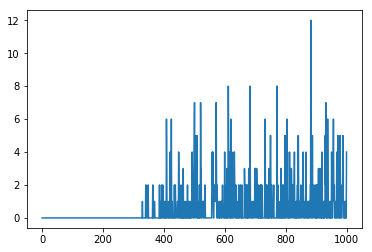

In [15]:
plt.plot(success_history)

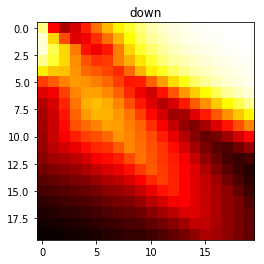

Text(0.5,1,'right')

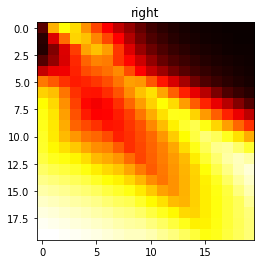

In [12]:
learnt_policy = np.expand_dims(np.zeros_like(env.ground_truth).astype(np.float32), -1)
learnt_policy = np.concatenate([learnt_policy,learnt_policy],-1)
for s0 in range(env.ground_truth.shape[0]):
    for s1 in range(env.ground_truth.shape[1]):
        state = np.array([s0,s1]).astype(np.float32)
#        state = np.array([s0,s1]).astype(np.float32) / 20.
        policy_mean = t_policy_mean.eval({t_state: np.expand_dims(state,0)}, sess)[0]
        learnt_policy[s0,s1,:] = policy_mean
plt.imshow(learnt_policy[:,:,0], 'hot')
plt.title('down')
plt.show()
plt.imshow(learnt_policy[:,:,1], 'hot')
plt.title('right')

赤: 下  
青: 右

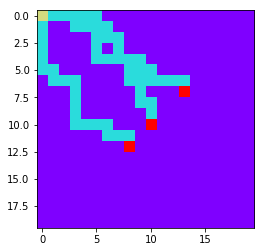

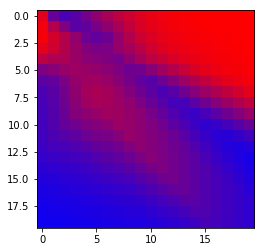

In [13]:
learnt_policy = np.expand_dims(np.zeros_like(env.ground_truth).astype(np.float32), -1)
learnt_policy = np.concatenate([learnt_policy,learnt_policy,learnt_policy],-1)
for s0 in range(env.ground_truth.shape[0]):
    for s1 in range(env.ground_truth.shape[1]):
        state = np.array([s0,s1]).astype(np.float32)
        policy_mean = t_policy_mean.eval({t_state: np.expand_dims(state,0)}, sess)[0]
        learnt_policy[s0,s1,0] = policy_mean[0]
        learnt_policy[s0,s1,2] = policy_mean[1]
plt.imshow(env.ground_truth, 'rainbow', interpolation='nearest')
plt.show()
plt.imshow(learnt_policy)

In [14]:
if model=='one-layer':
    learnt_weights = t_weights.eval(sess)
elif model=='two-layers':
#    learnt_weights = t_weights1.eval(sess),t_weights2.eval(sess)
    pass


#print(initial_weights)
#print(learnt_weights)